# HABERMAN DATASET VISUALIZATION

In [1]:
#Importing libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("../AAIC/haberman.csv", 
                  names = ["pat_age", "op_year", "no_axillary", "sur_status"])

In [3]:
df.head()

,pat_age,op_year,no_axillary,sur_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# objective
This dataset consists of 4 columns of which 3 are independent variables and 1 is dependent variable.

Our main objective is to find relation among independent variables in such a manner that they can predict the survival_status for any new entry.

For that we have to visualize some relation on the basis of which we can predict about survival of patient.

To generate this relation we use different tools offered by EDA.





Understanding about columns.

pat_age = this is the age of patient at the time of operation.

op_year = year in which operation is done.

no_axillary = no of positive axillary nodes detected.

sur_status = this tell if a patient will survive more than 5 years or die within 5 years.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
pat_age        306 non-null int64
op_year        306 non-null int64
no_axillary    306 non-null int64
sur_status     306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


No of entries are 306 in which their is no missing data all the values are of integer type 


In [5]:
df.describe()

,pat_age,op_year,no_axillary,sur_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
#import numpy as np
survived = df.loc[df["sur_status"] == 1]
n_survived = df.loc[df["sur_status"]== 2]
'''To refer elements of column sur_status with name i.e. positive
for 1(i.e for people who survived for more than 5 years) and negative 
for 2(i.e for people who survived for less than 5 years)'''

'To refer elements of column sur_status with name i.e. positive\nfor 1(i.e for people who survived for more than 5 years) and negative \nfor 2(i.e for people who survived for less than 5 years)'

In [30]:
#No of people belong to survive and not survive class....
df['sur_status'].value_counts()


1    225
2     81
Name: sur_status, dtype: int64

# 2-D scatter plots

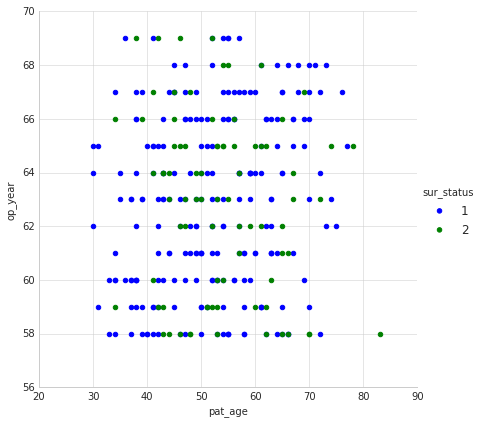

In [83]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="sur_status", size=6) \
   .map(plt.scatter, "pat_age", "op_year") \
   .add_legend()   
plt.show()

Scatter plot b/w pat_age and op_year is mixed i.e positive and negative values of sur_status are not easily seperable.


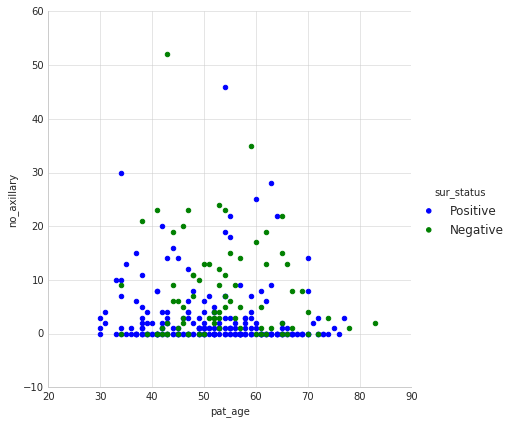

In [49]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="sur_status", size=6) \
   .map(plt.scatter, "pat_age", "no_axillary") \
   .add_legend()   
plt.show()

This gives an idea that the patient belong survived category mostly have less no of positive active nodes.
Although their are some deviation too but in general people having less positive axillary nodes survived more

# Pair-plots

We generated relation among differnt pairs possible to find any relation 


No of pairs possible C(n,2)
n ----> no of independent variables

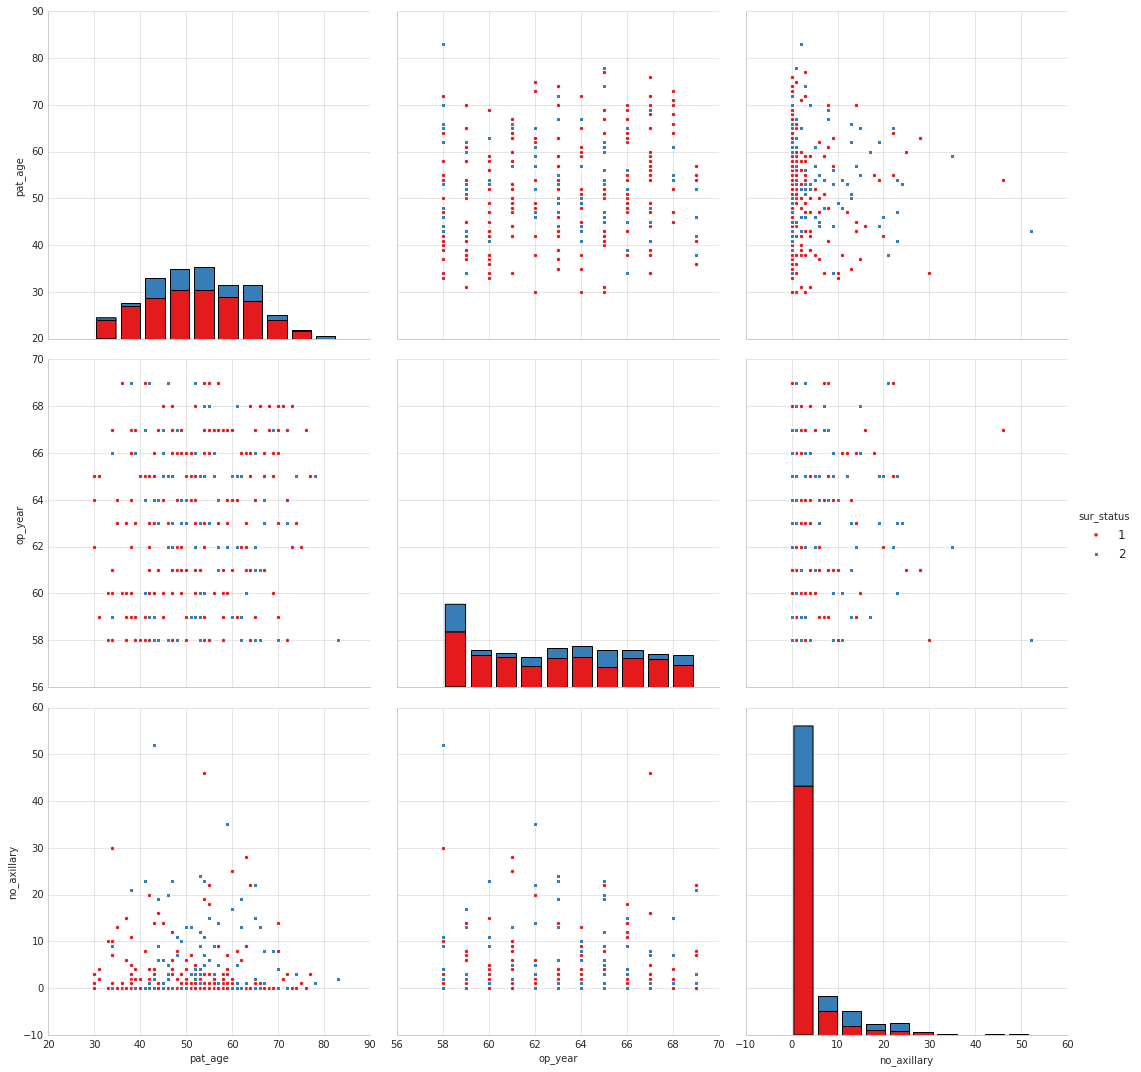

In [102]:

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, vars = ["pat_age", "op_year", "no_axillary"], hue="sur_status",palette="Set1",markers=["o", "s"], size=5)
plt.show()

No two variables can find any relation to build a model for future prediction.
Since in every plot(except diagonal) point are mixed and provides no information on how to separate positive and negative class.
And diagonal plots  gives relation b/w no of patients and their corresponding variables... basically it is a histogram...

Plots in 2 dimension are not able not provide much information therefore now we plot 1 D plots....

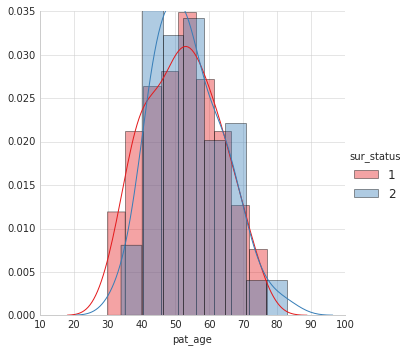

In [97]:
sns.FacetGrid(df, hue="sur_status", size=5 , palette="Set1") \
   .map(sns.distplot, "pat_age") \
   .add_legend()
plt.show()

Most of the patient belongs to age group b/w 45-60 years

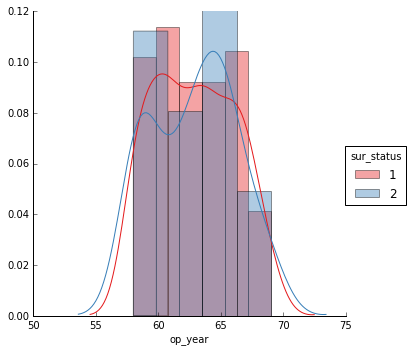

In [31]:
sns.FacetGrid(df, hue="sur_status", size=5 , palette="Set1") \
   .map(sns.distplot, "op_year") \
   .add_legend()
plt.show()

Operation conducted b/w 1958-63 bring maximun no of negative cases.
As most of the patient operated b/w this time period not survived much.

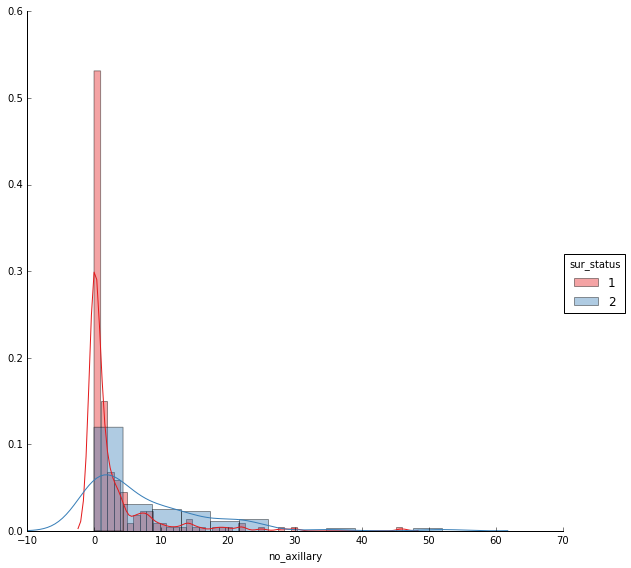

In [33]:
sns.FacetGrid(df, hue="sur_status", size=8 , palette="Set1") \
   .map(sns.distplot, "no_axillary") \
   .add_legend()
plt.show()

Even though their are some negative cases but majority of people having 1 active axillary node survived more.


CDF curve observation:
    

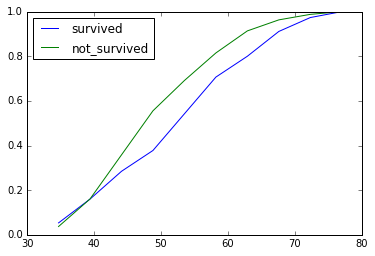

In [47]:
#CDF PLOT FOR PATIENT AGE:
counts_p, bin_edges_p = np.histogram(df['pat_age'][df['sur_status']==1], bins=10, 
                                 density = True)
counts_n, bin_edges_n = np.histogram(df['pat_age'][df['sur_status']==2], bins=10, 
                                 density = True)
pdf_p = counts_p/(sum(counts_p))
pdf_n = counts_n/(sum(counts_n))

cdf_p = np.cumsum(pdf_p)
cdf_n = np.cumsum(pdf_n)

#plt.plot(bin_edges[1:],pdf)
#plt.subplot(121)
plt.plot(bin_edges_p[1:], cdf_p  , label = 'survived')
#plt.subplot(122)
plt.plot(bin_edges_p[1:], cdf_n , color = 'green', label= 'not_survived')


plt.legend(loc=2)
plt.show()

Observing both curves it can be easily traced that slope of people surviving curve  increses more in 50-60 years of age.
And patient b/w 40-48 years not survived much indicated by green curve.



operation performed mainly on the people of age group 50-60 years.

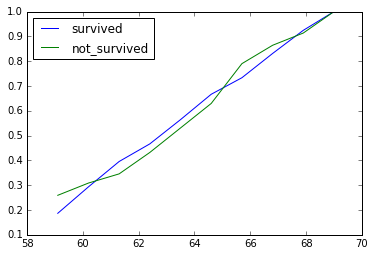

In [54]:
#CDF PLOT FOR OPERATION YEAR
counts_p, bin_edges_p = np.histogram(df['op_year'][df['sur_status']==1], bins=10, 
                                 density = True)
counts_n, bin_edges_n = np.histogram(df['op_year'][df['sur_status']==2], bins=10, 
                                 density = True)
pdf_p = counts_p/(sum(counts_p))
pdf_n = counts_n/(sum(counts_n))

cdf_p = np.cumsum(pdf_p)
cdf_n = np.cumsum(pdf_n)

#plt.plot(bin_edges[1:],pdf)
#plt.subplot(121)
plt.plot(bin_edges_p[1:], cdf_p  , label = 'survived')
#plt.subplot(122)
plt.plot(bin_edges_p[1:], cdf_n , color = 'green', label= 'not_survived')


plt.legend(loc=2)
plt.show()

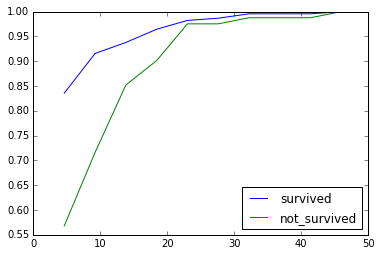

In [56]:
#CDF PLOT FOR NO. OF POSITVE AXILLARY:
counts_p, bin_edges_p = np.histogram(df['no_axillary'][df['sur_status']==1], bins=10, 
                                 density = True)
counts_n, bin_edges_n = np.histogram(df['no_axillary'][df['sur_status']==2], bins=10, 
                                 density = True)
pdf_p = counts_p/(sum(counts_p))
pdf_n = counts_n/(sum(counts_n))

cdf_p = np.cumsum(pdf_p)
cdf_n = np.cumsum(pdf_n)

#plt.plot(bin_edges[1:],pdf)
#plt.subplot(121)
plt.plot(bin_edges_p[1:], cdf_p  , label = 'survived')
#plt.subplot(122)
plt.plot(bin_edges_p[1:], cdf_n , color = 'green', label= 'not_survived')


plt.legend(loc=4)
plt.show()

Clearly indicated nearly 83% people survived have only 1-5 positive active axillary.

Observing Mean and Standard deviation:

In [14]:
#Computing mean about patient age:
print np.mean(positive['pat_age'])
print np.mean(negative['pat_age'])
#From here we conclude that their are more older people in not_survive category. 
#Also by observing min and max value of pat_age it confirms the absence of any outlier in dataset......

52.01777777777778
53.67901234567901


In [16]:
#Computing Standard deviation of patient age:
print np.std(positive['pat_age'])
print np.std(negative['pat_age'])
#almost similar spread....

10.987655475100508
10.104182193031312


In [18]:
#Computing mean of operation year:
print np.mean(positive['op_year'])
print np.mean(negative['op_year'])

62.86222222222222
62.82716049382716


In [19]:
#Computing Standaard deviation of operation year:
print np.std(positive['op_year'])
print np.std(negative['op_year'])

3.2157452144021947
3.3214236255207887


In [20]:
#Computing mean of No of axillary present:
print np.mean(positive['no_axillary'])
print np.mean(negative['no_axillary'])

2.7911111111111113
7.45679012345679


In [21]:
#Computing Standard deviation of No of axillary present:
print np.std(positive['no_axillary'])
print np.std(negative['no_axillary'])

5.857258449412138
9.128776076761635


Observing Quantiles:

In [22]:
print np.percentile(positive['pat_age'],np.arange(0,100,25))
print np.percentile(negative['pat_age'],np.arange(0,100,25))

[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [23]:
print np.percentile(positive['op_year'],np.arange(0,100,25))
print np.percentile(negative['op_year'],np.arange(0,100,25))

[58. 60. 63. 66.]
[58. 59. 63. 65.]


In [24]:
print np.percentile(positive['no_axillary'],np.arange(0,100,25))
print np.percentile(negative['no_axillary'],np.arange(0,100,25))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


After observing min and max value of every clumn from dataset it is clear that their  is no outlier entry present in dataset.
hence computing median need not required....

# BOX-PLOT

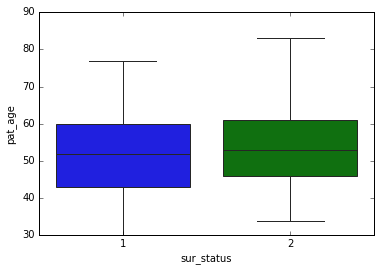

In [57]:
sns.boxplot(x='sur_status',y='pat_age', data=df)
plt.show()

This concludes that younger people have more chances to survive for more than five year after operation as compare to older people as in negative box plot more people who died are above 52 years in age.  

Also the people who survive as per Positive box plot are below the age of 52 years

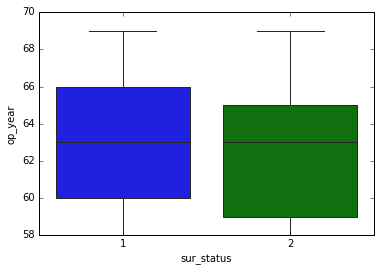

In [58]:
sns.boxplot(x='sur_status',y='op_year', data=df)
plt.show()

from above boxplot we conclude that year 1963-64 brings some changes in medical science as patient who not survived are operated before 1963(Green box plot).
But people who not survived much are those whose operation was done before the year of 1963-1964.



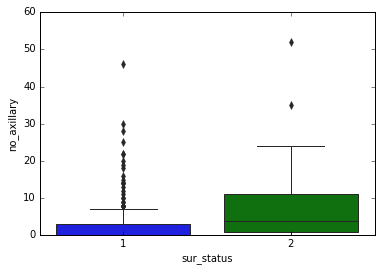

In [59]:
sns.boxplot(x='sur_status',y='no_axillary', data=df)
plt.show()

# VIOLIN PLOTS

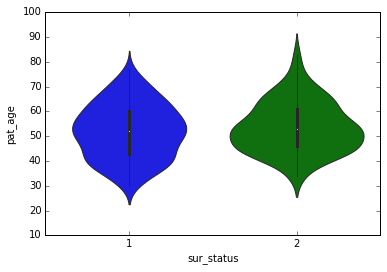

In [62]:
sns.violinplot(x="sur_status", y="pat_age", data=df, size=8)
plt.show()

Violin plot combines the result obtained by pdf curve and Box plots 
Consider blue plot:
    
Its shape indicates that Pat_age of patient survived is more distibuted but majority of patient lies in the range 50-60 years.
Black line in middle tells about quantiles.
Consider green plot:
    
Its shape indicates that 40-48 year old patient are mostly in non-survival category.

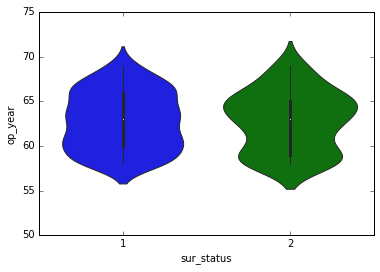

In [63]:
sns.violinplot(x="sur_status", y="op_year", data=df, size=8)
plt.show()

Conclusion:
    Their is sudden increase in no. of patient who not survive after operation which operated b/w 1963-65.

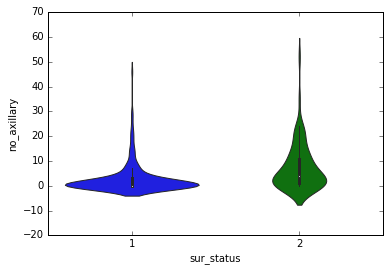

In [64]:
sns.violinplot(x="sur_status", y="no_axillary", data=df, size=8)
plt.show()

patient having no of axillary node positive equals to 1 have more chance of survival.

# JOINT PLOT

Joint plot shows the relation b/w 2 variables just like pair plot b/w joint plot are more easy to read.

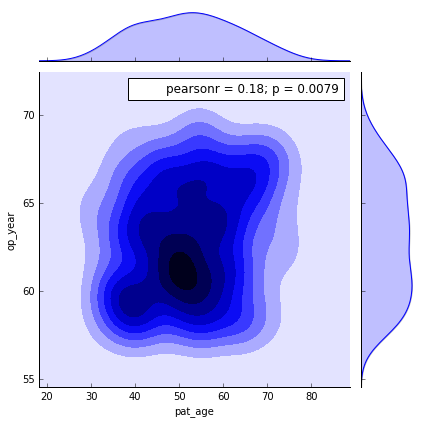

In [82]:
sns.jointplot(x="pat_age", y="op_year", data=survived, kind="kde")
plt.show()

Patient belonging to 50-60 years of age and operated b/w 1960-65 are more likely to survive.

Also if we fix age group (ex: 50-60 years) and then visualize color rings then it shows that ring are more closer below a darkest ring and more far away above darkest ring.
this shows chances of survival for this category is more after 1960-65.

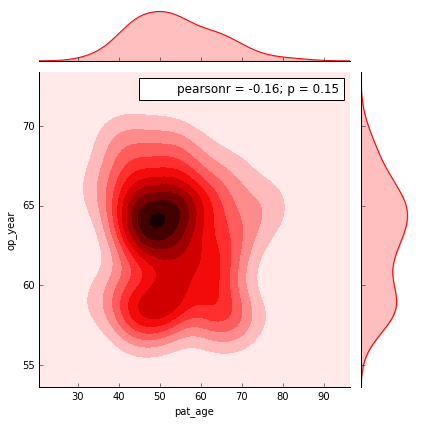

In [101]:
sns.jointplot(x="pat_age", y="op_year", data=n_survived, kind="kde", color= 'red')
plt.show()

As expected thickness of rings is opposite to above plots hence in starting years patient operated have less chance of survival.

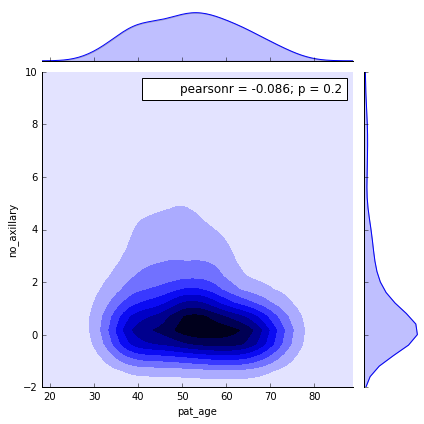

In [93]:
sns.jointplot(x="pat_age", y="no_axillary", data=survived, kind="kde" , ylim= (-2,10))
plt.show()

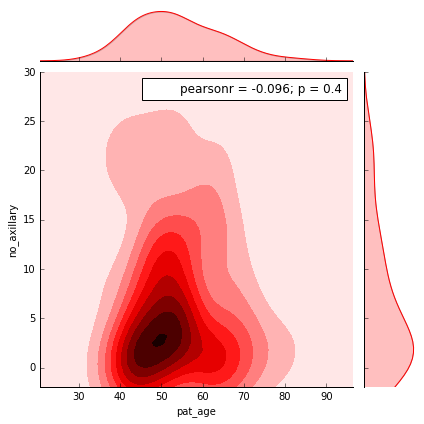

In [96]:
sns.jointplot(x="pat_age", y="no_axillary", data=n_survived, kind="kde" , ylim= (-2,30), color= 'red')
plt.show()

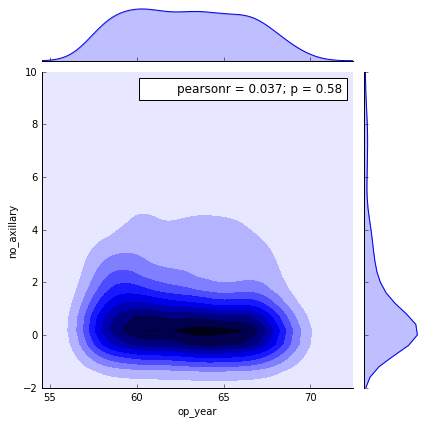

In [99]:
sns.jointplot(x="op_year", y="no_axillary", data= survived, kind="kde" , ylim= (-2,10))
plt.show()

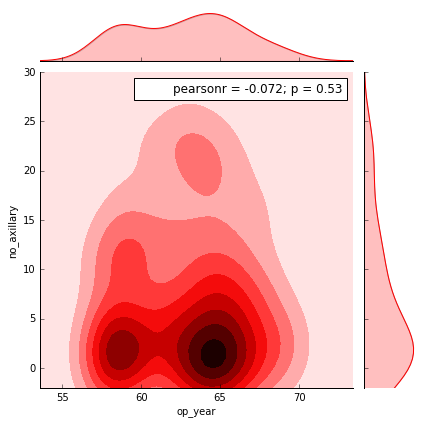

In [100]:
sns.jointplot(x="op_year", y="no_axillary", data=n_survived, kind="kde" , ylim= (-2,30), color= 'red')
plt.show()